In [25]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [28]:
raw_data = pd.read_csv('songs_data.tsv', sep='\t')
raw_data.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
0,2BgEsaKNfHUdlh97KmvFyo,2002,Anne-Marie,"tropical house,pop,dance pop,pop dance,post-te...",10228985,76,183,Speak Your Mind (Deluxe),2018-04-27,72,186986,False,81
1,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),"Sam Smith,Kim Petras","uk pop,transpop,pop,dance pop","20747240,825245","87,82",182,Unholy (feat. Kim Petras),2022-09-22,88,156943,False,100
2,4Pbg79cTBu4vgSphoyNq3j,2002,Anne-Marie,"tropical house,pop,dance pop,pop dance,post-te...",10228985,76,183,2002,2018-04-19,52,186986,False,63
3,2Zc3DlVHtwqAVE4KcdajnN,2022,"Baby Storme,Alex Cain",NaN,"43572,43","34,18",183,2022,2022-04-08,25,192000,False,36
4,65fpYBrI8o2cfrwf2US4gq,Rewrite The Stars,"Zac Efron,Zendaya","pop,dance pop,hollywood,show tunes,post-teen pop","757199,3556331","67,69",183,The Greatest Showman (Original Motion Picture ...,2017-12-08,77,217440,False,72


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3000 non-null   object
 1   name               3000 non-null   object
 2   artist             3000 non-null   object
 3   genres             2552 non-null   object
 4   artist_followers   3000 non-null   object
 5   artist_popularity  3000 non-null   object
 6   markets            3000 non-null   int64 
 7   album              3000 non-null   object
 8   released_date      3000 non-null   object
 9   album_popularity   3000 non-null   int64 
 10  duration           3000 non-null   int64 
 11  explicit           3000 non-null   bool  
 12  popularity         3000 non-null   int64 
dtypes: bool(1), int64(4), object(8)
memory usage: 284.3+ KB


In [40]:
songs_data_des = pd.read_csv('songs_data_des.csv', error_bad_lines=False)
songs_data_des.head(12)

/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_22042/360287482.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  songs_data_des = pd.read_csv('songs_data_des.csv', error_bad_lines=False)
Skipping line 11: expected 4 fields, saw 5



,column name,data type,meaning,example
0,id,string,The Spotify ID of track,3nqQXoyQOWXiESFLlDF1hG
1,name,string,The name of the track,Unholy (feat. Kim Petras)
2,artist,string,The artist(s) of the track,"""Sam Smith-Kim Petras"""
3,genres,string,The genres of that artist(s),"""uk pop-transpop-pop-dance pop"""
4,artist_followers,string,The number of followers of the artist(s),"""20747240-825245"""
5,artist_popularity,string,"""The popularity of the artist(s). The value w...","""87-82"""
6,markets,int,The number of markets (countries) which the t...,182
7,album,string,The album of the track,Unholy (feat. Kim Petras)
8,released_date,date,The released date of the track,2022-09-22
9,duration,int,The duration of the track,156943


In [6]:
raw_data[raw_data['genres'].isnull()]

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
3,2Zc3DlVHtwqAVE4KcdajnN,2022,"Baby Storme,Alex Cain",NaN,"43572,43","34,18",183,2022,2022-04-08,25,192000,False,36
8,5ap60nWktPedZGd3vmHVUa,2022,"Randy C,Jessica Zraly,Stephen Scaccia",NaN,"2429,209,2548","37,16,30",183,2022,2022-11-19,0,236444,False,1
23,2TuYMu1asxVxdDFAJ7RPLc,2022,Nehi Banda,NaN,9,9,183,2022,2022-10-15,14,216278,True,24
24,45sv69N1tMsztMhOj6yhfz,2022 Tanging Ain't Dead Cypher,Dre Cannon Music,NaN,215,29,183,2022 Tanging Ain't Dead Cypher,2022-02-21,36,139088,False,47
25,2bnJ8IxZnVc2YmUaX0sZap,JIKJIN,TREASURE,NaN,2253560,69,182,THE SECOND STEP : CHAPTER ONE,2022-02-15,68,184117,False,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,3rQx9XGXKMSGt8yfcl62lh,Game Day,"T'Challa King,Bobby Brown Jr.",NaN,"16,2","24,11",183,King (2020 Remastered),2020-05-23,32,204408,False,28
2971,3NtFFUN00SHlS2cNBmt1eA,Fiesta,La Mejor Música Electrónica,NaN,127257,38,183,Lo Mas Nuevo 2020,2020-02-14,39,168000,False,33
2975,4CnR8R4yuQkaIo5UpOyafw,La techno bleue,Roland Cristal,NaN,14755,47,183,2020,2020-07-23,29,187278,False,32
2983,0WI8wjsavAYZqIszjfb0Ne,Kita Pernah Ada,Iqbaal Ramadhan,NaN,27558,41,183,Kita Pernah Ada (Ost. Milea : Suara Dari Dilan...,2020-01-10,24,274860,False,34


In [7]:
raw_data['genres'].isnull().sum()

448

<AxesSubplot: >

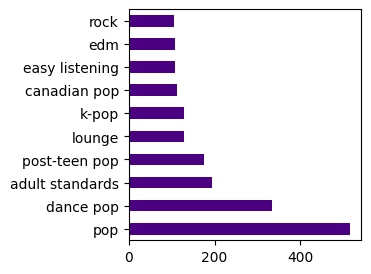

In [8]:
raw_data['genres'].str.split(',').explode().value_counts().nlargest(n=10).plot.barh(figsize=(3,3), color='indigo')

<AxesSubplot: >

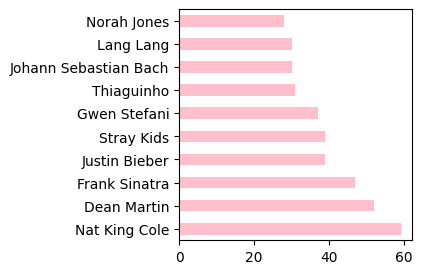

In [9]:
raw_data['artist'].str.split(',').explode().value_counts().nlargest(n=10).plot.barh(figsize=(3,3), color='pink')

<AxesSubplot: >

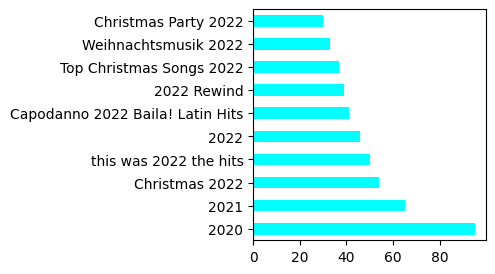

In [10]:
raw_data['album'].explode().value_counts().nlargest(n=10).plot.barh(figsize=(3,3), color='cyan')

<BarContainer object of 7 artists>

<Figure size 3000x3000 with 0 Axes>

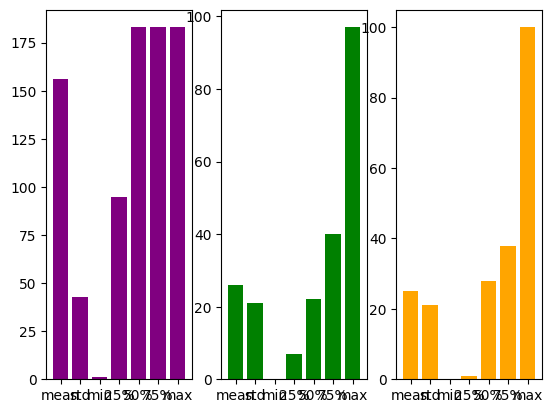

In [11]:
describe_data = raw_data.describe().astype('int').drop('count').drop('duration', axis=1)

plt.figure(figsize=(30, 30))
fig,ax = plt.subplots(1, 3)
ax[0].bar(describe_data.index, describe_data['markets'], color = 'purple')
ax[1].bar(describe_data.index, describe_data['album_popularity'], color = 'g')
ax[2].bar(describe_data.index, describe_data['popularity'], color = 'orange')

In [12]:
raw_data['id'].duplicated().sum()

35

In [13]:
raw_data[raw_data['popularity'] > 95]

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
1,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),"Sam Smith,Kim Petras","uk pop,transpop,pop,dance pop","20747240,825245","87,82",182,Unholy (feat. Kim Petras),2022-09-22,88,156943,False,100
50,0V3wPSX9ygBnCm8psDIegu,Anti-Hero,Taylor Swift,pop,62242379,100,182,Midnights,2022-10-21,97,200690,False,97
102,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),"David Guetta,Bebe Rexha","pop,dance pop,edm,pop dance,big room,post-teen...","25000248,7705804","88,83",182,I'm Good (Blue),2022-08-26,86,175238,True,97


In [14]:
# a = raw_data['id'].value_counts()
raw_data[raw_data['id'].duplicated()]

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
891,57fEVcmQhGZzUPPZv8JYbM,The Happiest Christmas Tree - Remastered 2009,Nat King Cole,"adult standards,vocal jazz",1924942,71,95,Merry Christmas 2022,2022-11-18,2,105346,False,0
1000,2BgEsaKNfHUdlh97KmvFyo,2002,Anne-Marie,"tropical house,pop,dance pop,pop dance,post-te...",10228985,76,183,Speak Your Mind (Deluxe),2018-04-27,72,186986,False,81
1009,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,"lgbtq+ hip hop,pop",12046643,81,183,MONTERO (Call Me By Your Name),2021-03-31,67,137875,True,77
1017,4ZtFanR9U6ndgddUvNcjcG,good 4 u,Olivia Rodrigo,pop,21938885,83,183,SOUR,2021-05-21,89,178146,True,86
1051,4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,pop,24357974,89,183,Harry's House,2022-05-20,91,167303,False,91
1101,6Uj1ctrBOjOas8xZXGqKk4,Woman,Doja Cat,"pop,dance pop",22925278,86,183,Planet Her,2021-06-25,85,172626,True,87
1115,7dJVE53hGAX9TcKH0abFic,Yêu Thầm,"Hoàng Yến Chibi,tlinh,TDK","vietnamese hip hop,indie viet,vietnamese melod...","144907,232678,164","33,55,39",183,Yêu Thầm,2021-04-07,28,252500,False,39
1150,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),"The Kid LAROI,Justin Bieber","canadian pop,pop,australian hip hop","4081700,67477351","80,89",182,STAY (with Justin Bieber),2021-07-09,76,141805,True,87
2000,2BgEsaKNfHUdlh97KmvFyo,2002,Anne-Marie,"tropical house,pop,dance pop,pop dance,post-te...",10228985,76,183,Speak Your Mind (Deluxe),2018-04-27,72,186986,False,81
2002,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,"lgbtq+ hip hop,pop",12046643,81,183,MONTERO (Call Me By Your Name),2021-03-31,67,137875,True,77


In [15]:
raw_data_np = np.array(raw_data)

for i in range(len(raw_data_np)):
    raw_data_np[i, 2] = raw_data_np[i, 2].split(',')
    raw_data_np[i, 3] = raw_data_np[i, 3].split(',') if type(raw_data_np[i, 3]) != float else ['None']
    raw_data_np[i, 4] = list(map(int, raw_data_np[i, 4].split(',')))
    raw_data_np[i, 5] = list(map(int, raw_data_np[i, 5].split(',')))
    raw_data_np[i, 8] = datetime.strptime(raw_data_np[i, 8], '%Y-%m-%d') if '-' in raw_data_np[i, 8] else datetime.strptime(raw_data_np[i, 8], '%Y')

In [16]:
songs_data = pd.DataFrame(raw_data_np, columns=raw_data.columns)
songs_data.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
0,2BgEsaKNfHUdlh97KmvFyo,2002,[Anne-Marie],"[tropical house, pop, dance pop, pop dance, po...",[10228985],[76],183,Speak Your Mind (Deluxe),2018-04-27,72,186986,False,81
1,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),"[Sam Smith, Kim Petras]","[uk pop, transpop, pop, dance pop]","[20747240, 825245]","[87, 82]",182,Unholy (feat. Kim Petras),2022-09-22,88,156943,False,100
2,4Pbg79cTBu4vgSphoyNq3j,2002,[Anne-Marie],"[tropical house, pop, dance pop, pop dance, po...",[10228985],[76],183,2002,2018-04-19,52,186986,False,63
3,2Zc3DlVHtwqAVE4KcdajnN,2022,"[Baby Storme, Alex Cain]",[None],"[43572, 43]","[34, 18]",183,2022,2022-04-08,25,192000,False,36
4,65fpYBrI8o2cfrwf2US4gq,Rewrite The Stars,"[Zac Efron, Zendaya]","[pop, dance pop, hollywood, show tunes, post-t...","[757199, 3556331]","[67, 69]",183,The Greatest Showman (Original Motion Picture ...,2017-12-08,77,217440,False,72


In [17]:
standard_data = np.copy(raw_data_np)

for i in range(len(standard_data)):
    standard_data[i, 4] = int(np.sqrt(np.sum(list(map(lambda x: x**2, standard_data[i, 4])))))
    standard_data[i, 5] = int(min(100, np.sqrt(np.sum(list(map(lambda x: x**2, standard_data[i, 5]))))))

model_data_np = np.array([[col for col in line if type(col) == int or type(col) == bool] for line in standard_data])

In [18]:
model_data = pd.DataFrame(model_data_np, columns=['followers', 'artist_popularity', 'markets', 'album_popularity', 'duration', 'explicit', 'popularity'])
model_data

,followers,artist_popularity,markets,album_popularity,duration,explicit,popularity
0,10228985,76,183,72,186986,0,81
1,20763646,100,182,88,156943,0,100
2,10228985,76,183,52,186986,0,63
3,43572,38,183,25,192000,0,36
4,3636047,96,183,77,217440,0,72
...,...,...,...,...,...,...,...
2995,6535001,85,183,49,146719,0,33
2996,161325,48,183,36,242705,0,33
2997,1286591,64,183,43,179774,0,33
2998,1286591,64,183,43,141008,0,33


In [19]:
songs_data.describe().drop('count')

/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_22042/4235602265.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  songs_data.describe().drop('count')


,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
unique,2965,2143,1625,957,1585,670,34.0,1343,779,91.0,2392.0,2,93.0
top,2BgEsaKNfHUdlh97KmvFyo,2020,[Nat King Cole],[None],[1924942],[71],183.0,2020,2022-11-11 00:00:00,0.0,115240.0,False,0.0
freq,3,120,51,448,51,195,1720.0,95,259,242.0,16.0,2519,610.0
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960-07-25 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-20 00:00:00,NaN,NaN,NaN,NaN


In [20]:
songs_data[songs_data['artist'].map(lambda x: len(x)) == songs_data['artist'].map(lambda x: len(x)).max()]

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
1359,2NOCnoRVXD4RXtaOq5PALC,NOW N NEW 2021,"[DOYOUNG, SEULGI, Baek Ji Young, SEO EUNKWANG,...","[korean mask singer, k-pop, k-pop girl group, ...","[554625, 616172, 136398, 38924, 43556, 139, 52...","[46, 63, 46, 29, 33, 15, 15, 29, 42, 64, 57, 2...",183,2021 NOW N NEW,2021-05-17,22,286306,False,32


In [21]:
model_data.corr(method='spearman')

,followers,artist_popularity,markets,album_popularity,duration,explicit,popularity
followers,1.000000,0.862029,-0.616469,-0.012868,0.044531,-0.228645,-0.155629
artist_popularity,0.862029,1.000000,-0.547213,0.033699,-0.048412,-0.162278,-0.088631
markets,-0.616469,-0.547213,1.000000,0.474897,0.146193,0.187198,0.562178
album_popularity,-0.012868,0.033699,0.474897,1.000000,0.091046,0.004517,0.903469
duration,0.044531,-0.048412,0.146193,0.091046,1.000000,-0.148186,0.103163
explicit,-0.228645,-0.162278,0.187198,0.004517,-0.148186,1.000000,0.069373
popularity,-0.155629,-0.088631,0.562178,0.903469,0.103163,0.069373,1.000000
